<a href="https://colab.research.google.com/github/afiflh/Machine_Learning/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS Pembelajaran Mesin

Nama : Afif Lukmanul hakim

Kelas : TI-3G

Nomor : 03

NIM : 2141720262

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

**Data Set Plat Nomor 1**

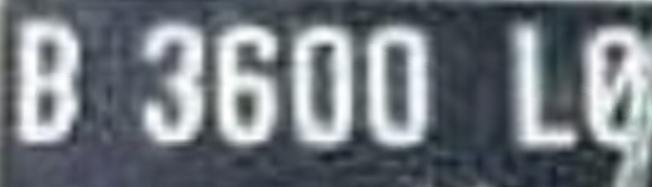

In [3]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Machine Learning/UTS/B3600LO.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img)

In [4]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

187
652
3


In [5]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(121924, 3)

In [6]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

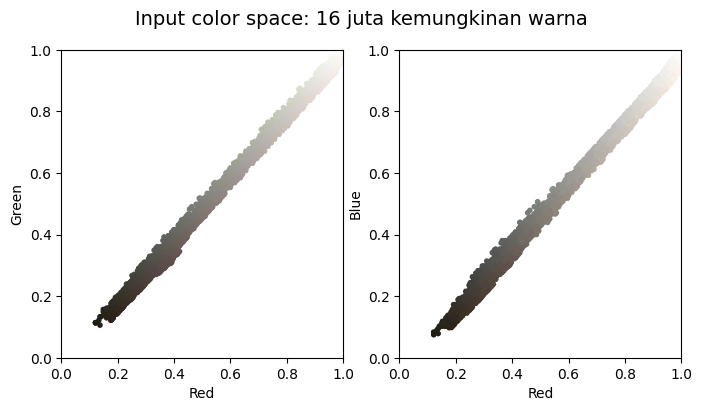

In [7]:
plot_pixels(data, title='Input color space: 16 juta kemungkinan warna')

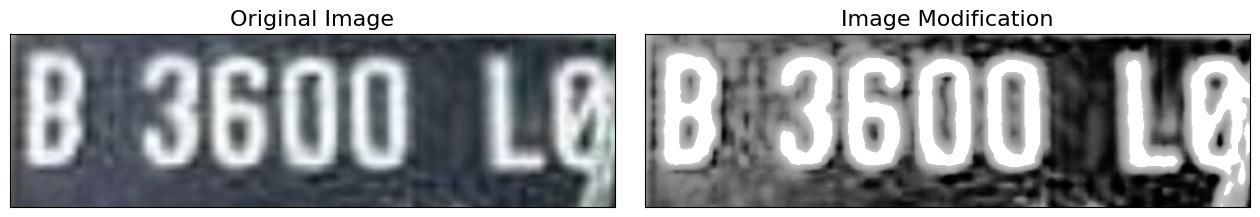

In [20]:
# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a contrast enhancement filter
enhanced_img = cv2.equalizeHist(gray_img)

# Convert the enhanced grayscale image back to RGB
enhanced_img_rgb = cv2.cvtColor(enhanced_img, cv2.COLOR_GRAY2BGR)

# Threshold the enhanced image to segment white regions
_, thresholded = cv2.threshold(enhanced_img, 200, 255, cv2.THRESH_BINARY)

# Convert the thresholded image to 3 channels for masking
thresholded_rgb = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2BGR)

# Create a masked image with the white regions
masked_img = cv2.addWeighted(enhanced_img_rgb, 1, thresholded_rgb, 0.7, 0)

# Display the original and enhanced images
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
ax[1].set_title('Image Modification', size=16)
plt.show()

**Data Set Plat Nomor 2**

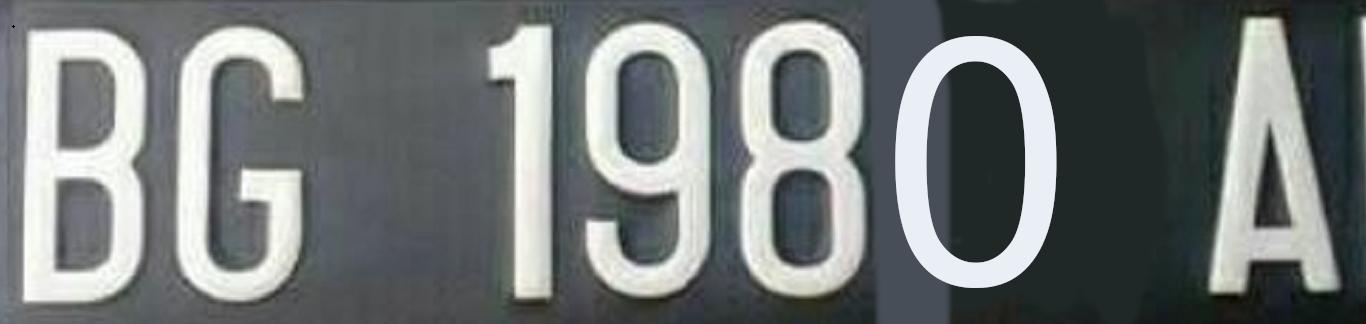

In [21]:
# Load Gambar
img2 = cv2.imread('/content/drive/MyDrive/Machine Learning/UTS/BG1980A.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img2)

In [23]:
h, w, ch= img2.shape
print(h)
print(w)
print(ch)

324
1366
3


In [26]:
data = img2 / 255.0
data2 = data.reshape(h * w, ch)
data2.shape

(442584, 3)

In [27]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data2

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data2.shape[0])[:N]
    colors = colors[i]
    R, G, B = data2[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

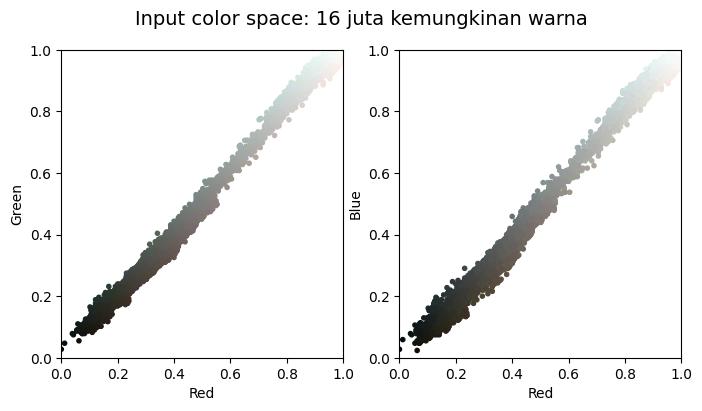

In [28]:
plot_pixels(data2, title='Input color space: 16 juta kemungkinan warna')

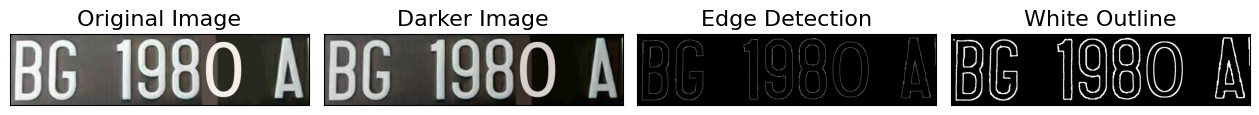

In [44]:
# Pengurangan kecerahan pada gambar
alpha = 1.0  # Faktor pengurangan kecerahan
beta = -30  # Faktor peningkatan ketajaman

img_darker = cv2.convertScaleAbs(img2, alpha=alpha, beta=beta)

# Operasi deteksi tepi pada gambar yang kecerahannya dikurangi
img_edges = cv2.Canny(img_darker, 100, 200)

# Mengisi bagian kosong di tengahnya dengan warna putih
kernel = np.ones((5, 5), np.uint8)
img_filled = cv2.dilate(img_edges, kernel, iterations=1)

# Membuat subplot
fig, ax = plt.subplots(1, 4, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

# Menampilkan gambar asli
ax[0].imshow(img2)
ax[0].set_title('Original Image', size=16)

# Menampilkan gambar yang kecerahannya dikurangi
ax[1].imshow(img_darker, cmap='gray')
ax[1].set_title('Darker Image', size=16)

# Menampilkan gambar dengan efek deteksi tepi
ax[2].imshow(img_edges, cmap='gray')
ax[2].set_title('Edge Detection', size=16)

# Menampilkan gambar dengan efek garis tepi putih
ax[3].imshow(img_filled, cmap='gray')
ax[3].set_title('White Outline', size=16)

# Menampilkan plot
plt.show()